## Generation of QR code
* STEP 1: Prepare the data in the form of 'vCard' data structure
* STEP 2: Convert 'vCard' into 'QRCode' data structure
* STEP 3: Save it as image

In [1]:
import segno
from segno import helpers

#### STEP 1: Prepare the data in the form of 'vCard' data structure
* Reference: 
    1. https://pypi.org/project/segno/
    2. https://readthedocs.org/projects/segno/downloads/pdf/0.3.0/

In [2]:
vcard = helpers.make_vcard_data(name='EFG;ABCD', displayname='Abcd Efg', email='efg@example.org', phone='+1234567890', url='http://www.abcd.org')
vcard

'BEGIN:VCARD\r\nVERSION:3.0\r\nN:EFG;ABCD\r\nFN:Abcd Efg\r\nEMAIL:efg@example.org\r\nTEL:+1234567890\r\nURL:http://www.abcd.org\r\nEND:VCARD\r\n'

#### STEP 2: Convert 'vCard' into 'QRCode' data structure

In [3]:
qr = segno.make(vcard)

#### STEP 3: Save it as image

In [4]:
qr.save('abcd.png',scale=4)

## Load and display the QRCode image
* We use 'openCV' library for loading image, and
* For displaying the image we use 'matplotlib' library

In [5]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [6]:
image = cv2.imread("abcd.png")

In [6]:
#print(image)

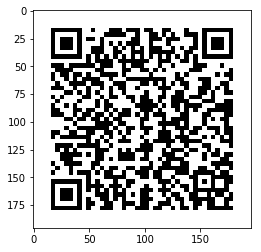

In [7]:
#plt.imshow(image)
#plt.show()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

## Decode the QR code image
* STEP 1: Decode it using 'pyzbar' library
* STEP 2: Extract the data from the object returned by this library
* STEP 3: Present the extracted data in a format suitable of easy interpretation by humans

In [8]:
import pyzbar.pyzbar as pyzbar
import re

#### STEP 1: Understanding the object returned by pyzbar
* 'pyzbar' returns an object which consists of several elements
* Among them we are interested mostly in 'data' element

In [9]:
decodedObjects = pyzbar.decode(image)
print(decodedObjects)

[Decoded(data=b'BEGIN:VCARD\r\nVERSION:3.0\r\nN:EFG;ABCD\r\nFN:Abcd Efg\r\nEMAIL:efg@example.org\r\nTEL:+1234567890\r\nURL:http://www.abcd.org\r\nEND:VCARD\r\n', type='QRCODE', rect=Rect(left=16, top=16, width=163, height=163), polygon=[Point(x=16, y=16), Point(x=16, y=179), Point(x=179, y=179), Point(x=179, y=16)])]


In [10]:
for obj in decodedObjects:
    typ = obj.type
    data = obj.data
    rect = obj.rect
    poly = obj.polygon
print('Type: ', typ)
print('Data: ', data)
print('Rectangle: ', rect)
print('Polygon: ', poly)

Type:  QRCODE
Data:  b'BEGIN:VCARD\r\nVERSION:3.0\r\nN:EFG;ABCD\r\nFN:Abcd Efg\r\nEMAIL:efg@example.org\r\nTEL:+1234567890\r\nURL:http://www.abcd.org\r\nEND:VCARD\r\n'
Rectangle:  Rect(left=16, top=16, width=163, height=163)
Polygon:  [Point(x=16, y=16), Point(x=16, y=179), Point(x=179, y=179), Point(x=179, y=16)]


#### STEP 2: Converting the 'data' into string type
* 'data' is in byte format i.e., in ASCII format
    * Reference: https://theasciicode.com.ar/
* It has to be converted into 'utf-8' format
    * Reference: https://www.geeksforgeeks.org/python-strings-decode-method/

In [11]:
data1 = data.decode('utf-8')
data1

'BEGIN:VCARD\r\nVERSION:3.0\r\nN:EFG;ABCD\r\nFN:Abcd Efg\r\nEMAIL:efg@example.org\r\nTEL:+1234567890\r\nURL:http://www.abcd.org\r\nEND:VCARD\r\n'

#### STEP 3: Splitting into separate lines / python list

In [12]:
data2=re.split(r'[\n]',data1)
data2

['BEGIN:VCARD\r',
 'VERSION:3.0\r',
 'N:EFG;ABCD\r',
 'FN:Abcd Efg\r',
 'EMAIL:efg@example.org\r',
 'TEL:+1234567890\r',
 'URL:http://www.abcd.org\r',
 'END:VCARD\r',
 '']

In [13]:
emails = []
urls = []
for line in data2:
    #print(line)
    line = re.split(r'[\:]',line,1) # the third argument '1' is necessary, figure out why?
    #print(line)
    if line[0]=='EMAIL':
        emails.append(line[1][:-1]) # figure out why [:-1] is necessary 
    if line[0]=='URL':
        urls.append(line[1][:-1])
print(emails)
print(urls)

['efg@example.org']
['http://www.abcd.org']


## Extraction of data from QR code image in real time

In [18]:
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_PLAIN

while True:
    _, frame = cap.read()
 
    decodedObjects = pyzbar.decode(frame)
    for obj in decodedObjects:
        #print("Data", obj.data)
        data = obj.data
        data1 = data.decode('utf-8')
        data2=re.split(r'[\n]',data1)
        #print(data2)
        emails = []
        urls = []
        for line in data2:
            #print(line)
            line = re.split(r'[\:]',line,1)
            #print(line)
            if line[0]=='EMAIL':
                emails.append(line[1][:-1])
            if line[0]=='URL':
                urls.append(line[1][:-1])
        #print(emails,urls)
        cv2.putText(frame, str(emails), (50, 50), font, 2, (255, 0, 0), 3)

    #cv2.putText(frame, str('Hi'),(50, 50), font, 2, (255, 0, 0), 3)
    cv2.imshow("Frame", frame)

    key = cv2.waitKey(30) & 0xff
    if key == 27 or cv2.getWindowProperty('Frame', 0)<0:
        break
cv2.destroyAllWindows()
cap.release()

# Project Assignment

### Two ways of learning any programing language
   * Coding your own programs
   * Debugging other's source codes
#### Now I am asking you to do it in second way

#### This program has lots of dependencies in which some of them are not available by default
Find which are available and install the unavailable packages on your system 
* Python: 3.6.7 
* segno: 1.0.0 
* OpenCV: 3.4.4 
* numpy: 1.13.3 
* pyzbar: 0.1.8 
* Matplotlib: 3.0.2 
* re: 2.2.1 

#### TASK # 01: Your task is to run this notebook successfully on your system
#### TASK # 02: Modify this note book to create a personalized QR code with multiple data values in one or two fields
Example: 
* Name data field - one name 
* Email Ids field - two alternative mail ids
* Phone numbers   - two alternative numbers
* Url data field  - one url

#### TASK # 03: Decode that QR code in real time 

# The End